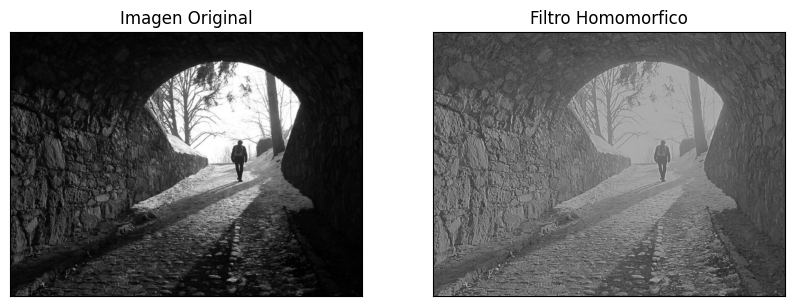

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('C:/Users/tomyl/OneDrive/Escritorio/Procesamiento de Imagenes Digitales/venv/TP3/img/tun.jpg',cv2.IMREAD_GRAYSCALE)
image_log = np.log1p(np.float64(image), dtype=np.float64)

f = np.fft.fft2(image_log, axes=(0,1))
fshift = np.fft.fftshift(f)

# filtro pasa altos en el domino de la frecuencia
d0=10
r1=0.5
rh=1.1
c=0.01
rows, cols = fshift.shape
crow, ccol = rows // 2, cols // 2

u = np.arange(rows).reshape(rows,1)
v = np.arange(cols)
d = np.sqrt((u - crow)**2 + (v - ccol)**2)

H = (rh - r1) * (1 - np.exp(-c * (d**2 / d0**2))) + r1

img_filtered = fshift*H

# aplicar la transformada inversa de Fourier
img_filtered_shift = np.fft.ifftshift(img_filtered)
img_filtered_real = np.real(np.fft.ifft2(img_filtered_shift, axes=(0,1)))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen Original')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
# scale result
img_homomorphic = cv2.normalize(np.expm1(img_filtered_real, dtype=np.float64), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(np.sqrt(img_homomorphic), cmap='gray')
plt.title('Filtro Homomorfico')
plt.xticks([]), plt.yticks([])

plt.show()

Una imagen puede considerarse como el resultado del producto entre su iluminación y su reflectancia. El filtro homomórfico permite tratar ambos componentes por separado, incluso sin conocerlos directamente.
Para ello, primero se aplica el logaritmo a la imagen y luego se calcula su transformada de Fourier. En el dominio de la frecuencia, se emplea un filtro pasa altos que atenúa las bajas frecuencias (relacionadas con la iluminación) y realza las altas frecuencias (asociadas a la reflectancia). Posteriormente, se realiza la transformada inversa de Fourier y se aplica la función exponencial para volver al dominio espacial.
Este proceso mejora el contraste y resalta los detalles de la imagen. En la imagen se observa claramente cómo la imagen procesada revela con mayor claridad características que en la versión original eran difíciles de distinguir.